In [82]:
# rearranging mnist

def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target,i) for i,target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
    

In [83]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1,cache=True)
mnist.target = mnist.target.astype(np.int8)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([5, 0, 4, ..., 4, 5, 6], dtype=int8),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  'pixel52',
  'p

In [84]:
dir(mnist)

['DESCR', 'categories', 'data', 'details', 'feature_names', 'target', 'url']

In [85]:
print(mnist.target)

[5 0 4 ... 4 5 6]


In [86]:
print(mnist.details)

{'id': '554', 'name': 'mnist_784', 'version': '1', 'format': 'ARFF', 'upload_date': '2014-09-29T03:28:38', 'licence': 'Public', 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff', 'file_id': '52667', 'default_target_attribute': 'class', 'tag': ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'], 'visibility': 'public', 'status': 'active', 'processing_date': '2018-10-03 21:23:30', 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}


In [87]:
sort_by_target(mnist)

In [88]:
print(mnist["target"])

[0 0 0 ... 9 9 9]


In [89]:
print(mnist.target)
# sorted

print(mnist.data.shape)

[0 0 0 ... 9 9 9]
(70000, 784)


In [90]:
X,y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [91]:
y.shape

(70000,)

(-0.5, 27.5, 27.5, -0.5)

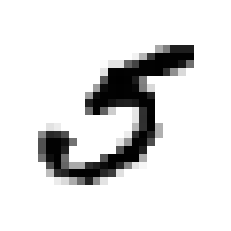

In [92]:
%matplotlib inline


import matplotlib.pyplot as plt 
import matplotlib as mpl
some_digit = X[36000]
some_digit.shape
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
#plt.show()

In [93]:
def plot_image(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [94]:
# extra

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1)// images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size,size*n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

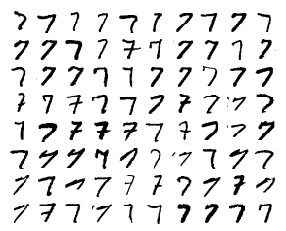

In [95]:
plot_digits(X[42000:42080])

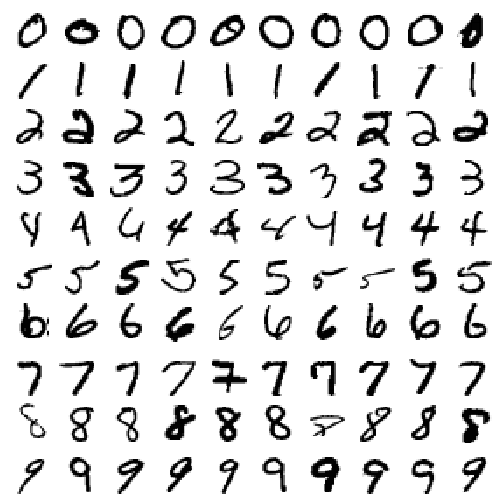

In [96]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [97]:
# creating test and train dataset
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000] 

In [98]:
# shuffle the training dataset

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [99]:
# training a binary classifier
# starting with the digit 5
# the classes being 5 and not 5

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [100]:
# now we need to pick a classifier to train it
# starting with SGD (stochastic gradient descent)
# advantage of SGD : handles large datasets easily
# since instances are trained independently they are alsowellsuited for online learning

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

#sgd relies on randomness during training

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
sgd_clf.predict([X[36000]])

array([False])

In [102]:
# performance measures for this model

# creating a custom cross validation function
# cross validation aim is to randomly split the dataset into 10 different subset called folds
# then it trains and evaluates the model 10 times
# evaluating on the fold and training on the remaining
# resulting in an array score of 10 values

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

print(skfolds)
print(skfolds.split(X_train, y_train_5))
# its a generator object

c_score = []
c_pred = []

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    c_pred.append(y_pred)
    n_correct = sum(y_pred == y_test_fold)
    c_score.append(n_correct/ len(y_pred))

print(c_score)
print(c_pred)

StratifiedKFold(n_splits=3, random_state=42, shuffle=False)
<generator object _BaseKFold.split at 0x0000020119DB3C48>
[0.9668, 0.96245, 0.9647]
[array([ True, False, False, ...,  True,  True,  True]), array([False, False, False, ..., False, False, False]), array([ True,  True, False, ..., False, False, False])]


In [103]:
# now using cross_val_score() for evaluation of SGDClassifier
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.9668 , 0.96245, 0.9647 ])

In [104]:
# lets have a trivial classifier

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, 
                scoring="accuracy")

# this over 90 accuracy come fromthe fact that only a small
# subset of digits are 5 rest all are not!

array([0.91215, 0.9069 , 0.9099 ])

In [105]:
# using cross_val_predict() to give a set of predictions
# it perform k fold validations however instead of returning accuracy returns prediction
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_5,cv=3)

In [106]:
print(y_train_pred[35990:36010])
print(y_train.shape)

[False False False False False False  True False False False False False
 False False False False False False False  True]
(60000,)


In [107]:
# using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

# first row is class of non5
# second row is class of 5
# first column is true positive
# second column is false positive

array([[53632,   947],
       [ 1174,  4247]], dtype=int64)

In [108]:
# for ex a perfect confusion matrix will look like
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [109]:
# there are other metrics that are often important
# precision = TP/ TP + FP
# Precision is also used alongwith another metric known as recall
# recall is also called true positive rate
# recall = TP / TP + FN

from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5, y_train_pred))

# it means if teh image is predicted as 5 then you
# can have only 78% confidence that it is 5
# also it only detects 64% of 5 as 5

0.8176742395071236
0.7834347906290352


In [110]:
# f1 score is a harmonic mean of precision and recall
# f1 = 2 / (1/precision + 1/recall)

from sklearn.metrics import f1_score
print(f1_score(y_train_5, y_train_pred))

# in some context you care about pricision 
# in other context we care about recall
# generally more precision would decrease recall


0.8001884126236457


In [111]:
# to set the thresholds of precision and recall - tradeoff
# we use decision_function() method

y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

[-834.11415893]


In [112]:
# for example
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

# Raising thershold decreases recall

[False]


In [113]:

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,cv=3, method="decision_function")

(60000,)
[-10728.38426511  -5823.61480188 -13744.91433268  -9618.98402773
  -5596.72406075  -8479.80458888  -8732.84447959 -14571.98568764
 -22201.46598614   6140.18772052]
[False False False False False False False False False False]


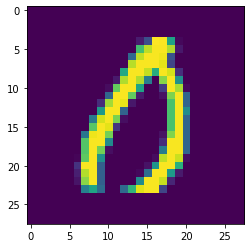

In [114]:
print(y_scores.shape)
print(y_scores[36000:36000+10])
print(y_train_5[36000:36000+10])
# 36002 should be a 5
possibly_5 = X_train[36002]
possibly_5_image = possibly_5.reshape(28,28)
plt.imshow(possibly_5_image)


In [115]:
# now we can compute precision and recallfor all possible thresholds
# using precision_recall_curve

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)



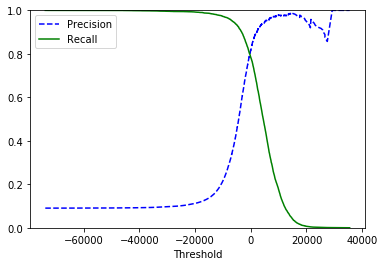

In [116]:
# plotting the curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--",label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-",label = "Recall")
    plt.xlabel("Threshold")
    plt.legend()
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# the graph for precision is bumpier because
# sometimres precision is bumpier than recall


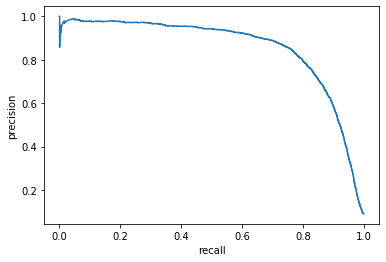

In [117]:
# plotting prcision vs racall
plt.plot( recalls,precisions)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [118]:
# using the tradeoff
# supposing you wnat 90 percent precision

print(y_scores.shape)
y_train_pred_90 = (y_scores>70000)
print(precision_score(y_train_5,y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))


(60000,)
0.0
0.0


C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
# ROC curve
# plots tpr - true positive rate (recall) vs False positive rate
# FPR = negative instances thatwere classified as positive
# FPR = 1- TNR true negative rate (specificity) negative instances classified as negative

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

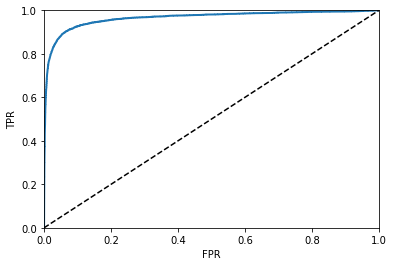

In [122]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

plot_roc_curve(fpr, tpr)
plt.show()

# a randomly generated classifier wouldeb the dooted line
# a good classifier would tend to move towards top left

In [123]:
from sklearn.metrics import roc_auc_score
# area under curve
# random classifer area = .5
# good classifier area =1

roc_auc_score(y_train_5, y_scores)

# an PR curve must be used when positive cases are less
# if positive cases are more then use ROC

0.9651372399579374

In [124]:
# training a random forest classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


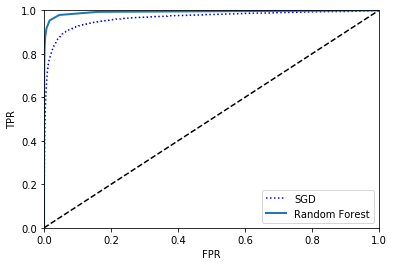

In [126]:
plt.plot(fpr,tpr,"b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [127]:
roc_auc_score(y_train_5, y_scores_forest)

0.9927971520352098

In [129]:
precisions, recalls, _ = precision_recall_curve(y_train_5, y_scores_forest)
print(precisions, recalls)

[0.09035    0.38266866 0.68200514 0.85007398 0.92563674 0.96445257
 0.98361019 0.99282178 0.99654776 0.99923751 1.         1.        ] [1.         0.99299022 0.9787862  0.95388305 0.91846523 0.87585316
 0.81922155 0.73990039 0.6389965  0.48349013 0.27209002 0.        ]
